## Date: 17-10-2023

## Project Title: Electricity Price Prediction

## Team ID: 3879

### Importing required packages

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Loading the dataset

In [34]:
electricity = pd.read_csv(r"C:\Users\Dell\Pictures\Camera Roll\electricity.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_19188\1120975176.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  electricity = pd.read_csv(r"C:\Users\Dell\Pictures\Camera Roll\electricity.csv")


### Set the jupyter notebook to display the maximum columns 

In [35]:
pd.options.display.max_columns = None

In [36]:
electricity

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.0,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.6


### Displaying top 5 Rows of data

In [37]:
electricity.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


### Displaying last 5 rows of data

In [38]:
electricity.tail()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
38009,31/12/2013 21:30,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.00,22.20,285.31,812.0,3692.95,42.45
38010,31/12/2013 22:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.00,24.10,278.31,852.0,3571.0,33.83
38011,31/12/2013 22:30,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.00,20.40,280.91,962.0,3460.29,31.75
38012,31/12/2013 23:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.00,14.80,302.46,950.0,3563.99,50.6
38013,31/12/2013 23:30,New Year's Eve,1,1,1,31,12,2013,47,1064.0,3624.25,33.83,5.00,16.70,308.01,1020.0,3517.08,34.9


### Shows number of rows and columns

In [39]:
print("Number of columns ",electricity.shape[1])
print("Number of rows ",electricity.shape[0])

Number of columns  18
Number of rows  38014


### Getting basic information about the dataset

In [40]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

### Data Exploration 

In [41]:
#DateTime column

In [42]:
electricity['DateTime'].unique()

array(['01/11/2011 00:00', '01/11/2011 00:30', '01/11/2011 01:00', ...,
       '31/12/2013 22:30', '31/12/2013 23:00', '31/12/2013 23:30'],
      dtype=object)

In [43]:
electricity['DateTime'].nunique()

38014

In [44]:
pd.to_datetime(electricity['DateTime']).describe()

C:\Users\Dell\AppData\Local\Temp\ipykernel_19188\3203971033.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pd.to_datetime(electricity['DateTime']).describe()


count                   38014
unique                  38014
top       2011-01-11 00:00:00
freq                        1
first     2011-01-11 00:00:00
last      2013-12-31 23:30:00
Name: DateTime, dtype: object

In [45]:
electricity['DateTime'].head(2)

0    01/11/2011 00:00
1    01/11/2011 00:30
Name: DateTime, dtype: object

In [46]:
#since our datetime columns has object format so we have convert into proper datatype format
electricity['DateTime'] = pd.to_datetime(electricity['DateTime'])

In [47]:
electricity.head(2)

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,2011-01-11 00:00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,2011-01-11 00:30:00,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23


In [48]:
electricity['DateTime'].dtypes

dtype('<M8[ns]')

In [49]:
#before heading to other, we want to confirm the null values exists, relationship between each column with others.

### Checking null values presence

In [50]:
electricity.isnull().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

### Finding relationship each column using heatmap

C:\Users\Dell\AppData\Local\Temp\ipykernel_19188\1051386638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  relationship = electricity.corr(method='pearson')


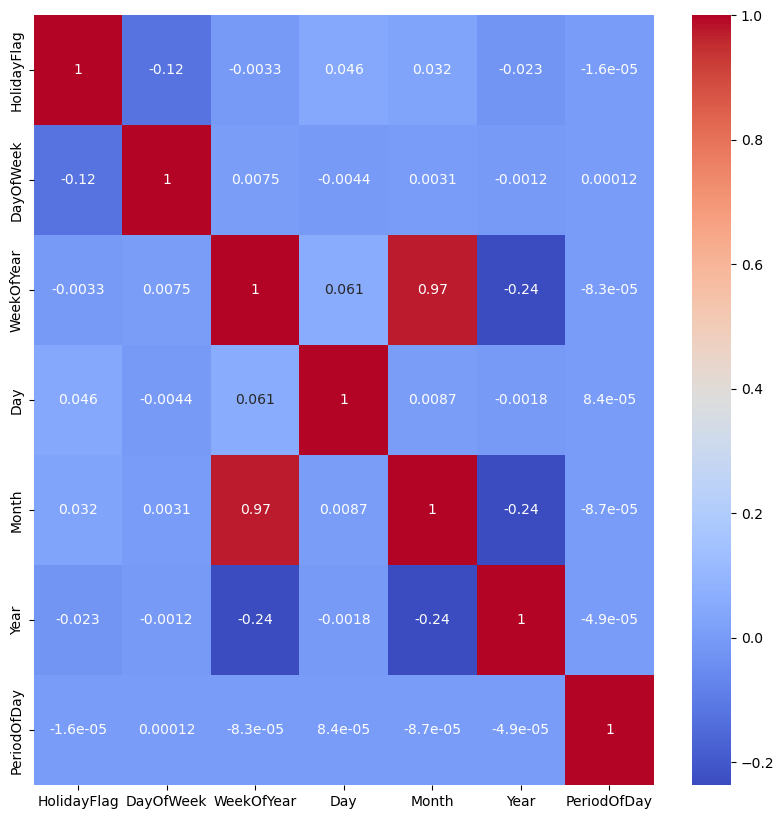

In [51]:
plt.figure(figsize=(10,10))
relationship = electricity.corr(method='pearson')
sns.heatmap(relationship,annot=True,cmap='coolwarm')
plt.show()

# RANDOM FOREST:

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv(r"C:\Users\Dell\Pictures\Camera Roll\Electricity.csv", na_values=['?'])

In [55]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')

In [56]:
numeric_columns = ['ForecastWindProduction', 'SystemLoadEA', 'SMPEA', 'ORKTemperature', 
                   'ORKWindspeed', 'CO2Intensity', 'SystemLoadEP2', 'SMPEP2','ActualWindProduction']

In [57]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df.dropna(subset=['ActualWindProduction'], inplace=True)

In [63]:
X = df.drop(['SMPEP2', 'DateTime', 'Holiday'], axis=1)  
y = df['SMPEP2']

In [64]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 38014 entries, 0 to 38013
Series name: SMPEP2
Non-Null Count  Dtype  
--------------  -----  
38014 non-null  float64
dtypes: float64(1)
memory usage: 297.1 KB


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [68]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [69]:
predictions = model.predict(X_test_scaled)

In [70]:
predictions

array([ 65.8993,  47.6677,  66.6215, ..., 119.3892,  85.4476,  53.6113])

In [71]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 471.7032589823058


In [73]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, predictions)*100
r2

60.64140063105309

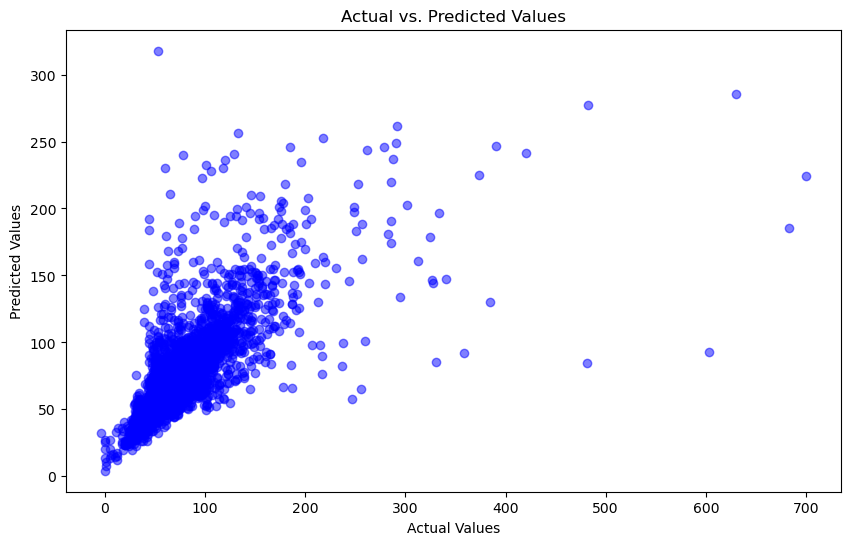

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

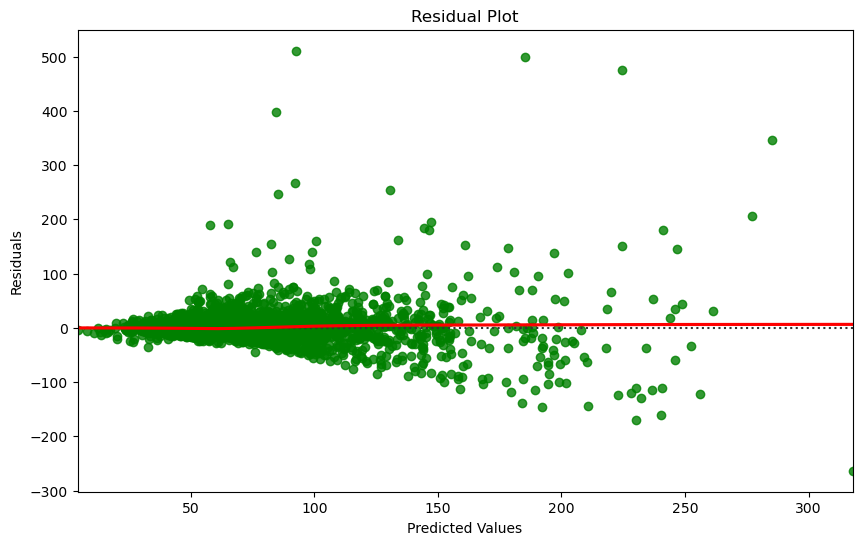

In [83]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=residuals, lowess=True, color='green', line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# LINEAR REGRESSION

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [79]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [80]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('Linear Regression - Mean squared error:', mse)

Linear Regression - Mean squared error: 693.3944074610428


In [81]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)*100
r2

42.14364185906284

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Decision tree regressor

In [88]:
model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [89]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mse

1118.4489854531105

In [90]:
r2= r2_score(y_test, y_pred)*100
r2

6.6773767303876514